## Exploratory Data Analysis

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
patt = pd.read_csv("training_data.csv")

In [16]:
patt.head()

,age,Position,short_passing,long_passing,ball_control,interceptions,positioning,vision,marking,gk_handling,...,league_English Premier League,league_French Ligue 1,league_French Ligue 2,league_German 2. Bundesliga,league_German Bundesliga,league_Italian Serie A,league_Italian Serie B,league_Spanish Primera Division,league_Spanish Segunda Division,league_Turkish Super Lig
0,27,Defender,72,68,75,71,63,68,76,7,...,1,0,0,0,0,0,0,0,0,0
1,30,Midfielder,78,68,80,55,75,74,28,12,...,0,0,0,0,1,0,0,0,0,0
2,30,Midfielder,76,54,80,42,71,73,40,7,...,1,0,0,0,0,0,0,0,0,0
3,28,Midfielder,68,60,72,45,70,67,38,13,...,0,0,0,0,0,0,0,0,1,0
4,19,Goalkeeper,21,19,26,12,5,41,12,59,...,1,0,0,0,0,0,0,0,0,0


In [17]:
print("Dimension of Player Attributes Table is: {}".format(patt.shape))

Dimension of Player Attributes Table is: (3147, 48)


In [18]:
print(patt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 48 columns):
age                                3147 non-null int64
Position                           3147 non-null object
short_passing                      3147 non-null int64
long_passing                       3147 non-null int64
ball_control                       3147 non-null int64
interceptions                      3147 non-null int64
positioning                        3147 non-null int64
vision                             3147 non-null int64
marking                            3147 non-null int64
gk_handling                        3147 non-null int64
gk_reflexes                        3147 non-null int64
Points-16/17                       3147 non-null int64
Start-16/17                        3147 non-null int64
Sub-16/17                          3147 non-null int64
Goals-16/17                        3147 non-null int64
A-16/17                            3147 non-null int64
CS-16/17    

In [19]:
print(patt.describe())

               age  short_passing  long_passing  ball_control  interceptions  \
count  3147.000000    3147.000000   3147.000000   3147.000000    3147.000000   
mean     25.769940      64.472831     58.324754     64.666349      51.361932   
std       4.490699      15.185465     15.602766     17.567088      22.640904   
min      16.000000      11.000000     10.000000     10.000000       5.000000   
25%      22.000000      60.000000     50.000000     62.000000      28.000000   
50%      26.000000      68.000000     62.000000     70.000000      58.000000   
75%      29.000000      74.000000     69.000000     75.000000      71.000000   
max      40.000000      92.000000     93.000000     95.000000      92.000000   

       positioning       vision      marking  gk_handling  gk_reflexes  \
count  3147.000000  3147.000000  3147.000000  3147.000000  3147.000000   
mean     54.836034    58.042898    47.598983    16.957102    17.460121   
std      21.180298    15.589142    23.929516    18.711848

In [20]:
print(patt.isnull().sum(axis=0))

age                                0
Position                           0
short_passing                      0
long_passing                       0
ball_control                       0
interceptions                      0
positioning                        0
vision                             0
marking                            0
gk_handling                        0
gk_reflexes                        0
Points-16/17                       0
Start-16/17                        0
Sub-16/17                          0
Goals-16/17                        0
A-16/17                            0
CS-16/17                           0
Yellow-16/17                       0
Red-16/17                          0
Off-16/17                          0
Pen_SV-16/17                       0
Pen_M-16/17                        0
Goals_conceded-16/17               0
OG-16/17                           0
Points-15/16                       0
Start-15/16                        0
Sub-16/17.1                        0
G

### Plotting correlation matrix

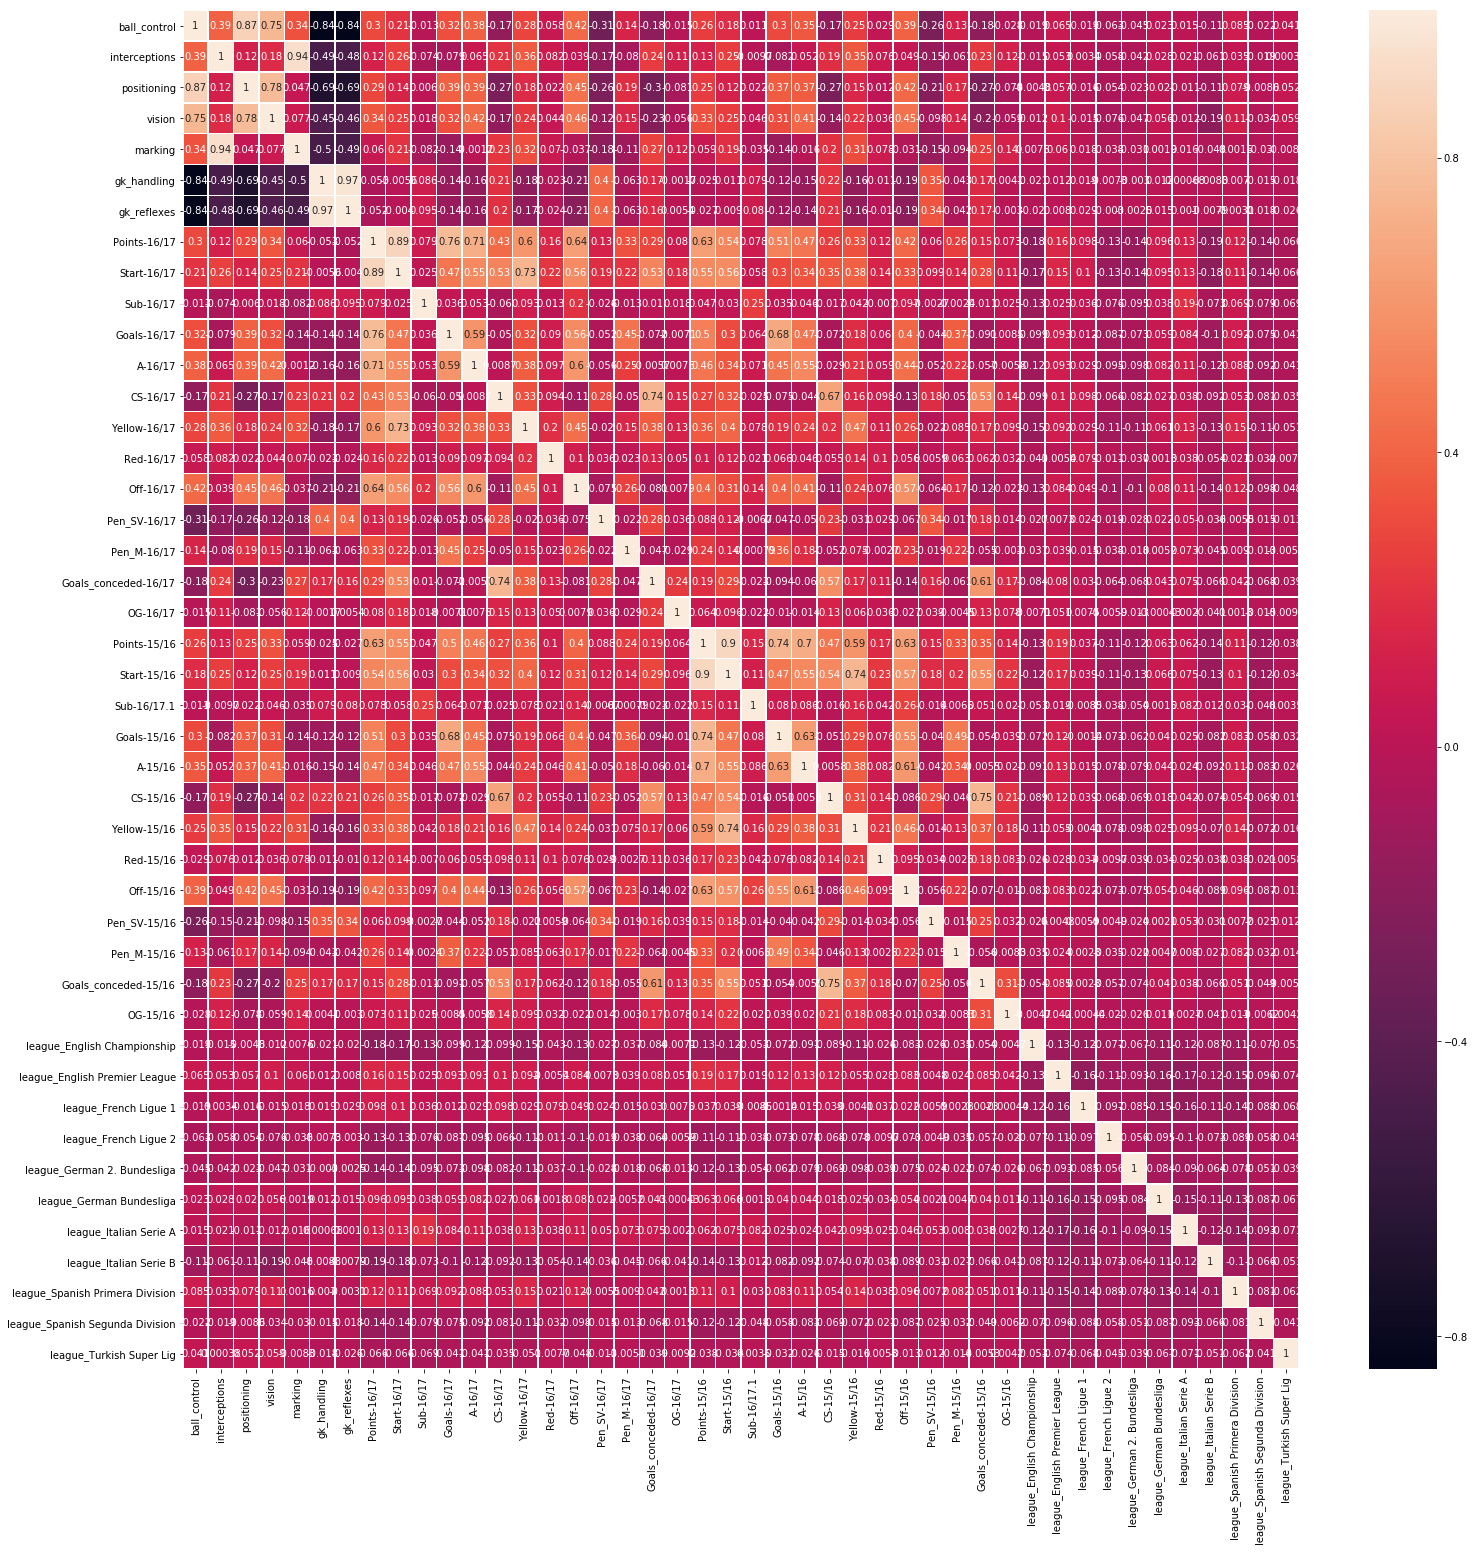

In [21]:
#plotting correlation matrix
corr2 = patt.select_dtypes(include =['float64','int64']).\
loc[:,patt.select_dtypes(include =['float64','int64']).columns[3:]].corr()
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=25,h=25)
sns_plot = sns.heatmap(corr2,annot = True,linewidths=0.4,ax = ax2)
figure = sns_plot.get_figure()
figure.savefig("output.png")

### Check correlation between a specified parameters and others

In [22]:
corr_matrix = patt.corr() 
corr_matrix["gk_handling"].sort_values(ascending=False)

gk_handling                        1.000000
gk_reflexes                        0.970038
Pen_SV-16/17                       0.404412
Pen_SV-15/16                       0.345024
CS-15/16                           0.215381
CS-16/17                           0.206403
Goals_conceded-15/16               0.169323
Goals_conceded-16/17               0.165274
age                                0.130971
Sub-16/17                          0.086476
Sub-16/17.1                        0.079401
league_French Ligue 1              0.018870
league_German Bundesliga           0.012283
league_English Premier League      0.011763
Start-15/16                        0.011368
league_Spanish Primera Division    0.007050
OG-15/16                           0.004138
league_Italian Serie A             0.000681
OG-16/17                          -0.001711
league_German 2. Bundesliga       -0.003021
Start-16/17                       -0.005554
league_French Ligue 2             -0.007284
league_Italian Serie B          